In [71]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
from bioinfoLib.topology.containers import HomologyData
from sklearn.neighbors import NearestNeighbors

sc.set_figure_params(figsize=(5, 5), fontsize=20)

In [137]:
adata = sc.read_h5ad("monkey_mouse_integrate_loop.h5ad")

In [3]:
sc.pp.neighbors(adata, use_rep="X_vae", n_neighbors=50, method="gauss")
sc.tl.diffmap(adata, n_comps=25)
adata.obsm["X_diffmap_vae"] = adata.obsm["X_diffmap"]
del adata.obsm["X_diffmap"]
sc.pp.neighbors(adata, use_rep="X_scvi", n_neighbors=50, method="gauss")
sc.tl.diffmap(adata, n_comps=25)
adata.obsm["X_diffmap_scvi"] = adata.obsm["X_diffmap"]
del adata.obsm["X_diffmap"]

In [247]:
mask = np.logical_or(
    adata.obs["cell_type"].str.contains(
        "Para.Meso|PSM|NMP|Nas|EPI|^PS|Caud.Meso", na=False
    ),
    adata.obs["celltype"].str.contains(
        "Epi|^Primi|Nascent|Somitic|Paraxial|Caudal epiblast|Caudal Mesoderm|NMP|Intermediate",
        na=False,
    ),
)
adata_sub = adata[mask, :].copy()

In [248]:
import mellon

model = mellon.DensityEstimator(ls_factor=1.0)
log_density = model.fit_predict(adata_sub.obsm["X_diffmap_vae"][:, 1:20])
adata_sub.obs["vae_density_log"] = log_density
model = mellon.DensityEstimator(ls_factor=1.0)
log_density = model.fit_predict(adata_sub.obsm["X_diffmap_scvi"][:, 1:20])
adata_sub.obs["scvi_density_log"] = log_density

[2025-07-22 05:31:58,244] [INFO    ] Using sparse Gaussian Process since n_landmarks (5,000) < n_samples (28,887) and rank = 1.0.
[2025-07-22 05:31:58,245] [INFO    ] Computing nearest neighbor distances.
[2025-07-22 05:31:58,747] [INFO    ] Using embedding dimensionality d=19. Use d_method="fractal" to enable effective density normalization.
[2025-07-22 05:31:58,902] [INFO    ] Using covariance function Matern52(ls=0.0066741472110152245).
[2025-07-22 05:31:58,904] [INFO    ] Computing 5,000 landmarks with k-means clustering (random_state=42).
[2025-07-22 05:32:47,654] [INFO    ] Using rank 5,000 covariance representation.
[2025-07-22 05:33:02,043] [INFO    ] Running inference using L-BFGS-B.
[2025-07-22 05:33:52,168] [INFO    ] Using sparse Gaussian Process since n_landmarks (5,000) < n_samples (28,887) and rank = 1.0.
[2025-07-22 05:33:52,170] [INFO    ] Computing nearest neighbor distances.
[2025-07-22 05:33:52,585] [INFO    ] Using embedding dimensionality d=19. Use d_method="fract

In [138]:
monkey_cmap = dict(zip(adata.obs["cell_type"], adata.obs["color"]))
mouse_cmap = dict(zip(adata.obs["celltype"], "#" + adata.obs["colour"].astype(str)))

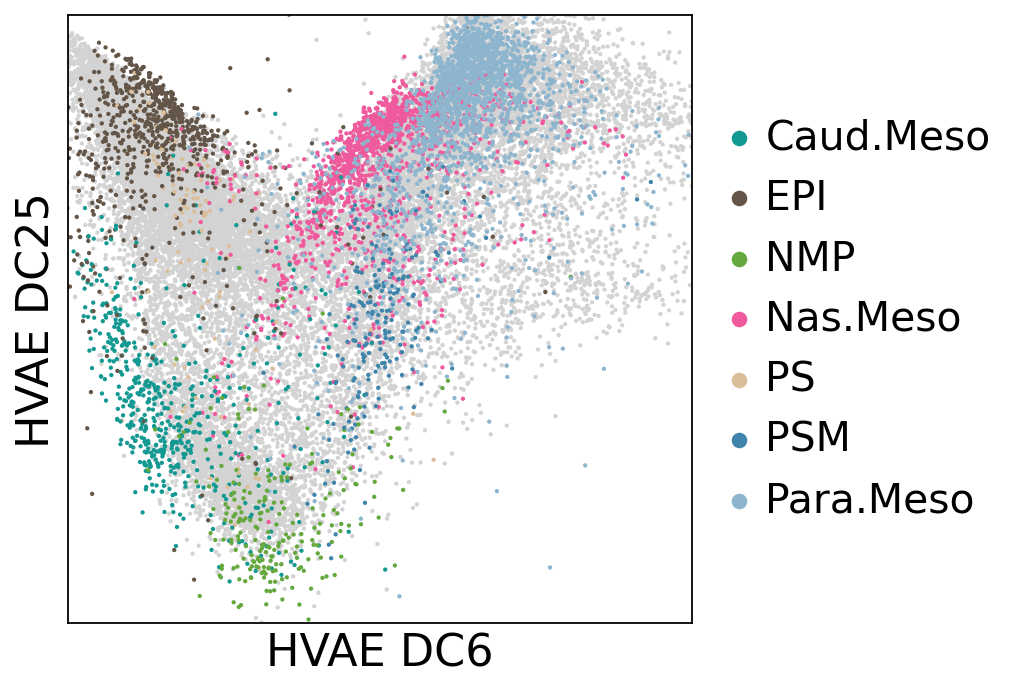

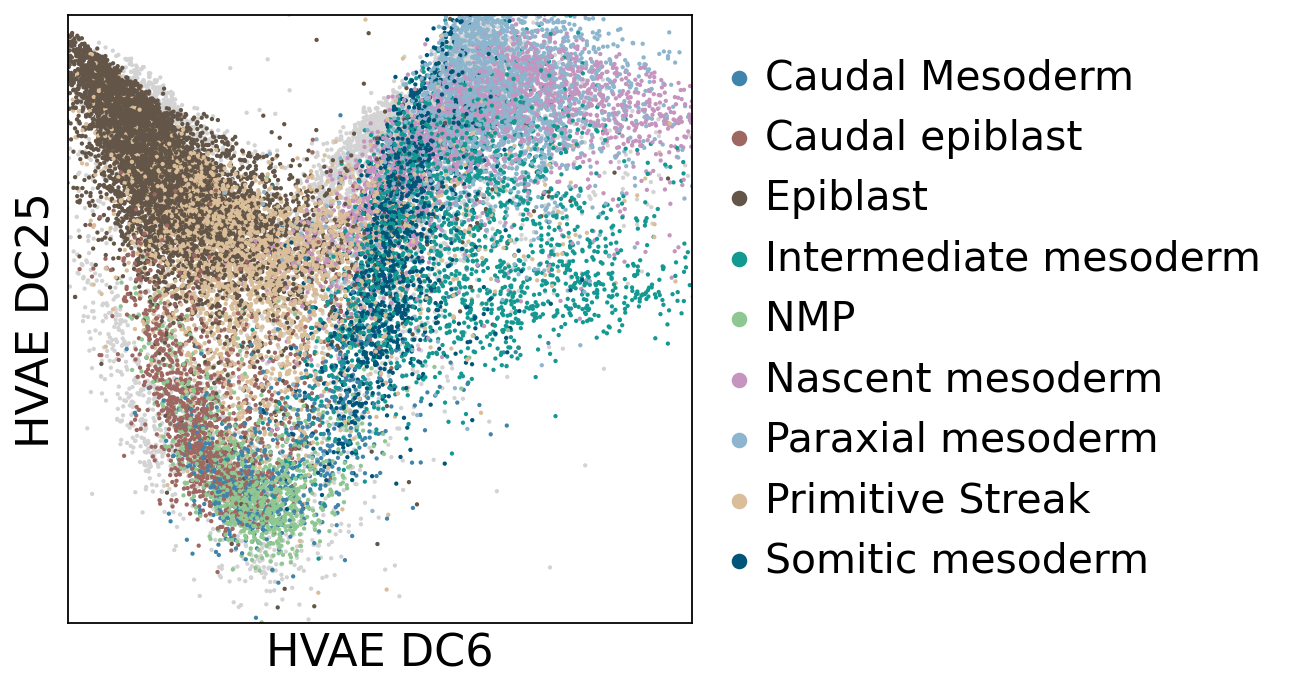

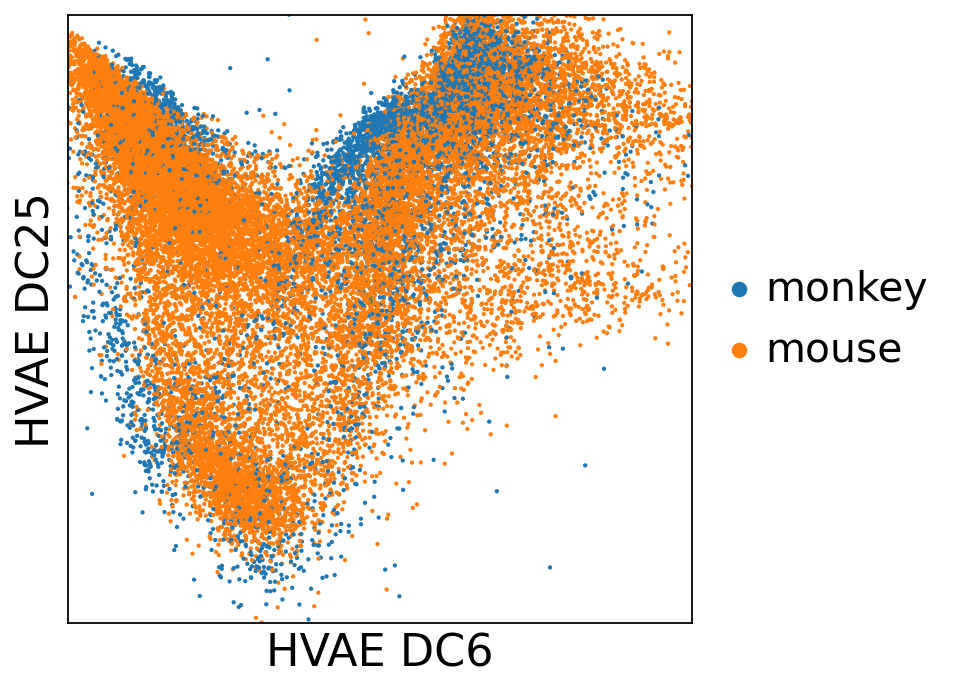

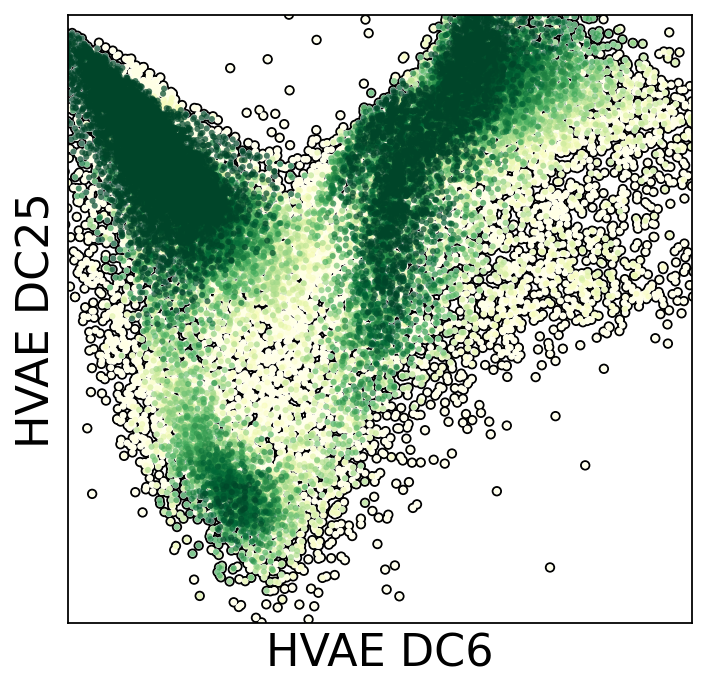

In [312]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["cell_type"],
    components="6,25",
    # legend_loc="on data",
    size=15,
    show=False,
    cmap="YlGn",
    na_in_legend=False,
    palette=monkey_cmap,
    frameon=True,
    title=["", ""],
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_monkey_somite_loop_annotation.png",
    dpi=300,
    bbox_inches="tight",
)

ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["celltype"],
    components="6,25",
    # legend_loc="on data",
    size=15,
    show=False,
    cmap="YlGn",
    na_in_legend=False,
    palette=mouse_cmap,
    frameon=True,
    title=["", ""],
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_mouse_somite_loop_annotation.png",
    dpi=300,
    bbox_inches="tight",
)

np.random.seed(1)
ax = sc.pl.embedding(
    adata_sub[np.random.permutation(adata_sub.shape[0]), :],
    basis="X_diffmap_vae",
    color=["species"],
    components="6,25",
    # legend_loc="on data",
    size=15,
    show=False,
    cmap="YlGn",
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_species.png",
    dpi=300,
    bbox_inches="tight",
)

ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["vae_density_log"],
    components="6,25",
    # legend_loc="on data",
    size=30,
    show=False,
    cmap="YlGn",
    vmax=150,
    add_outline=True,
    vmin=141,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_density.png",
    dpi=300,
    bbox_inches="tight",
)

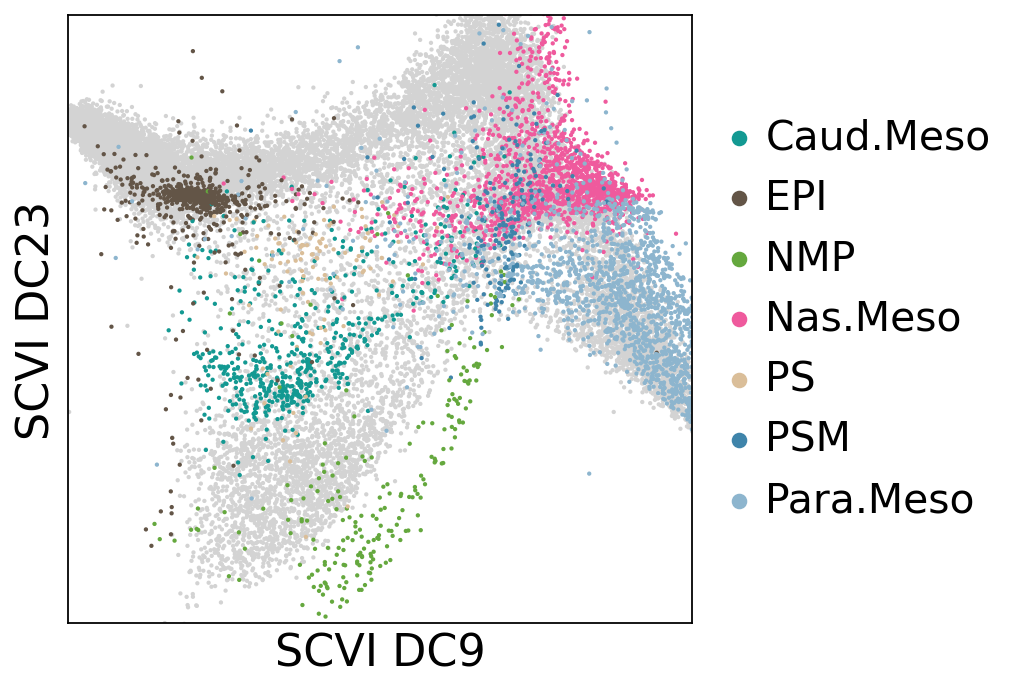

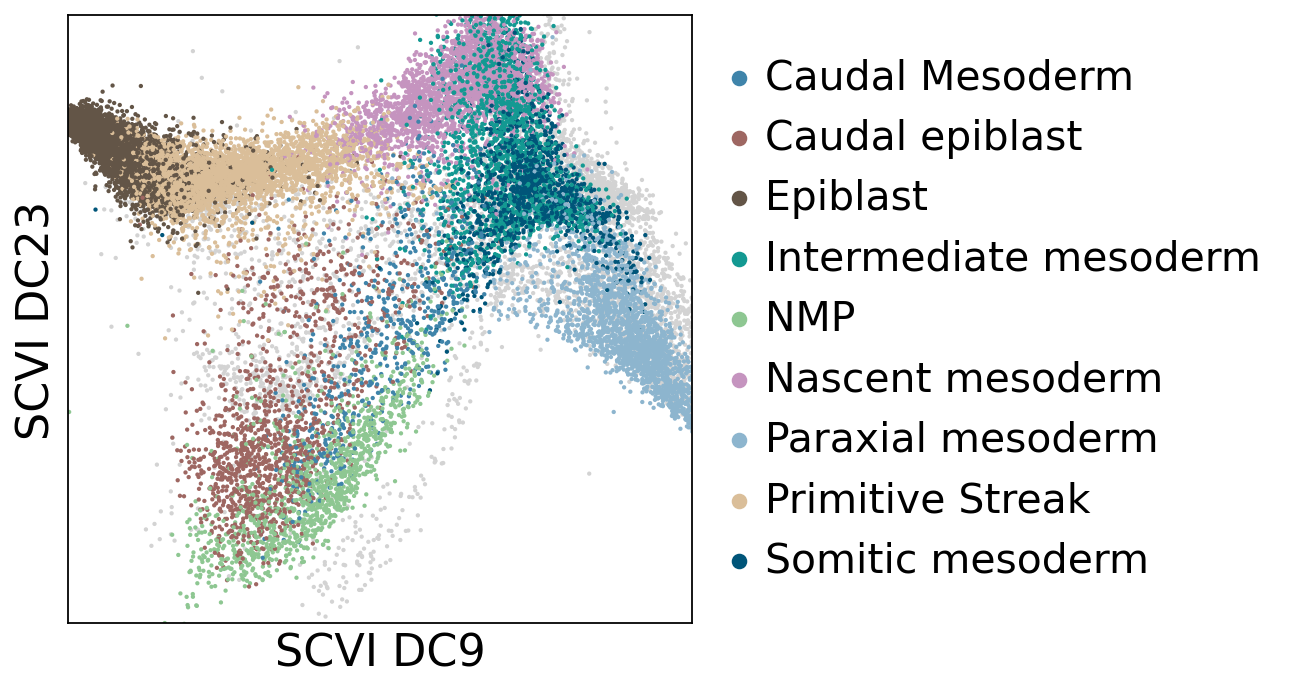

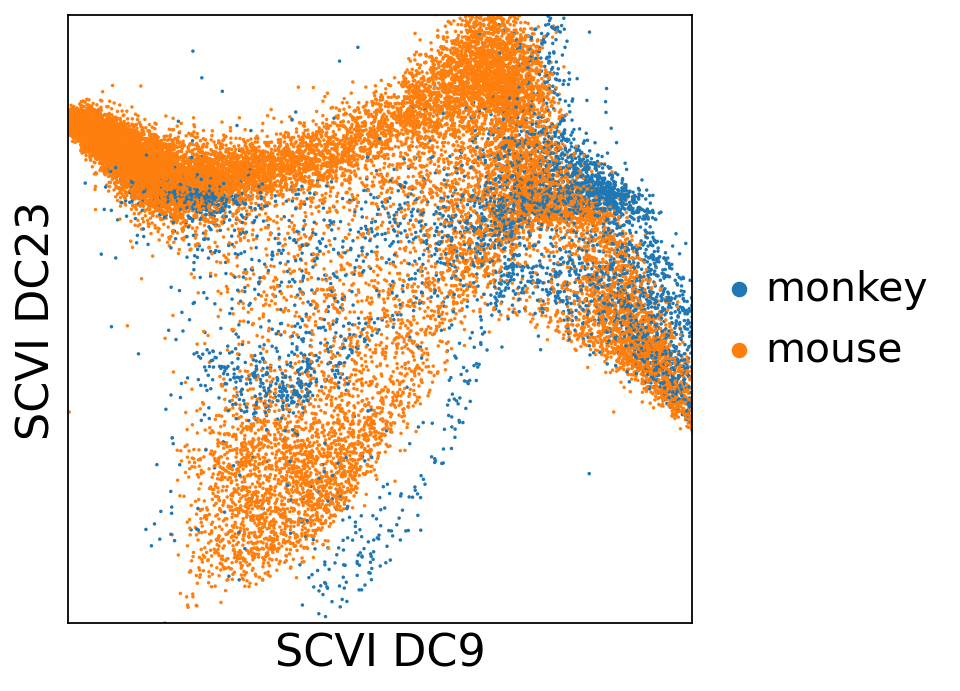

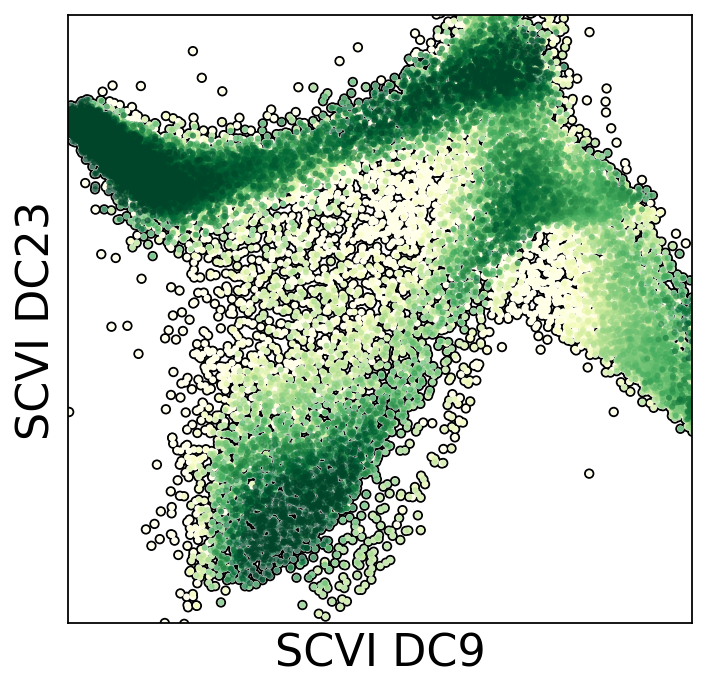

In [310]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_scvi",
    color=["cell_type"],
    components="9,23",
    # legend_loc="on data",
    size=15,
    show=False,
    cmap="YlGn",
    na_in_legend=False,
    palette=monkey_cmap,
    frameon=True,
    title=["", ""],
    # xlim=[0, 100]
)
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 8], [0.5, 97]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 22], [0.01, 98]))
ax.set_xlabel("SCVI DC9")
ax.set_ylabel("SCVI DC23")
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/scvi_monkey_somite_loop_annotation.png",
    dpi=300,
    bbox_inches="tight",
)

ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_scvi",
    color=["celltype"],
    components="9,23",
    # legend_loc="on data",
    size=15,
    show=False,
    cmap="YlGn",
    na_in_legend=False,
    palette=mouse_cmap,
    frameon=True,
    title=["", ""],
    # xlim=[0, 100]
)
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 8], [0.5, 97]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 22], [0.01, 98]))
ax.set_xlabel("SCVI DC9")
ax.set_ylabel("SCVI DC23")
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/scvi_mouse_somite_loop_annotation.png",
    dpi=300,
    bbox_inches="tight",
)

np.random.seed(1)
ax = sc.pl.embedding(
    adata_sub[np.random.permutation(adata_sub.shape[0]), :],
    basis="X_diffmap_scvi",
    color=["species"],
    components="9,23",
    # legend_loc="on data",
    size=10,
    show=False,
    cmap="YlGn",
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    # xlim=[0, 100]
)
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 8], [0.5, 97]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 22], [0.01, 98]))
ax.set_xlabel("SCVI DC9")
ax.set_ylabel("SCVI DC23")
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/scvi_somite_loop_species.png",
    dpi=300,
    bbox_inches="tight",
)

ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_scvi",
    color=["scvi_density_log"],
    components="9,23",
    # legend_loc="on data",
    size=30,
    show=False,
    cmap="YlGn",
    vmax=155,
    add_outline=True,
    vmin=141,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    # xlim=[0, 100]
)
ax.set_xlabel("SCVI DC9")
ax.set_ylabel("SCVI DC23")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 8], [0.5, 97]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, 22], [0.01, 98]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/scvi_somite_loop_density.png",
    dpi=300,
    bbox_inches="tight",
)

In [ ]:
# adata_sub.write_h5ad("monkey_mouse_somite_sub.h5ad")

In [59]:
adata_sub = sc.read_h5ad("monkey_mouse_somite_sub.h5ad")
adata_sub_homology = adata_sub.copy()
sc.pp.subsample(adata_sub_homology, n_obs=12000, random_state=1)
dat = HomologyData(
    adata_sub_homology.obsm["X_diffmap_vae"][:, 1:],
    adata_sub_homology.obsm["X_diffmap_vae"][:, [5, 24]],
)

In [60]:
out = dat.compute_original_loops_no_bd(0.01, 3)

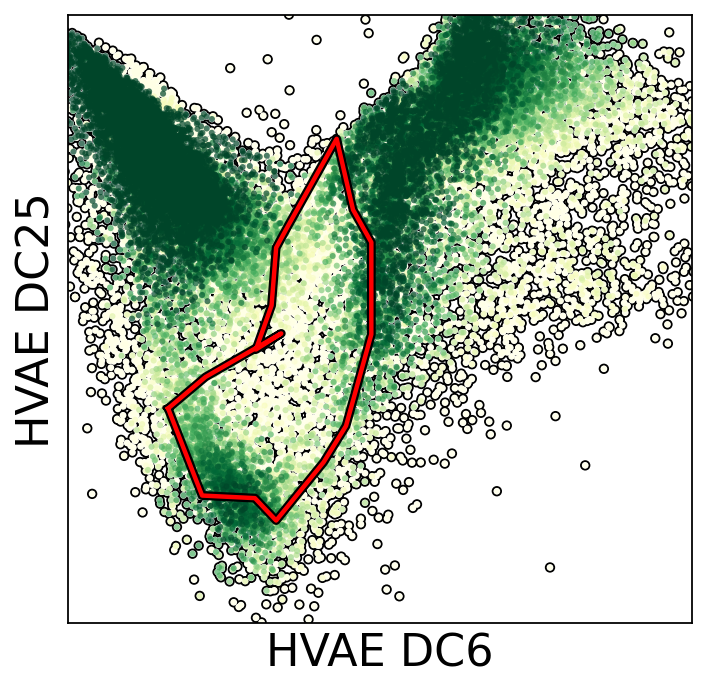

In [135]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["vae_density_log"],
    components="6,25",
    # legend_loc="on data",
    size=30,
    show=False,
    cmap="YlGn",
    vmax=150,
    add_outline=True,
    vmin=141,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
ax.plot(
    out[1][0][:, 0],
    out[1][0][:, 1],
    color="red",
    lw=2,
    path_effects=[path_effects.withStroke(linewidth=4, foreground="black")],
)
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_on_density.png",
    dpi=300,
    bbox_inches="tight",
)

In [67]:
dat.write_pkl("monkey_mouse_somite_loop.pkl")

In [210]:
query_points = out[0][0]
search_space = adata_sub.obsm["X_diffmap_vae"][:, 1:]
neighborhood = np.full(adata_sub.shape[0], np.nan, dtype=object)
round = 3
k = 200
for i in range(round):
    nbrs = NearestNeighbors(n_neighbors=k).fit(search_space)
    distances, indices = nbrs.kneighbors(query_points)
    neighborhood[np.unique(indices.flatten())] = "loop"
    query_points = np.concatenate(
        [query_points, search_space[indices.flatten()]], axis=0
    )
    k = k // 2
adata_sub.obs["loop_neighborhood"] = neighborhood

In [112]:
del adata_sub.uns["loop_neighborhood_colors"]

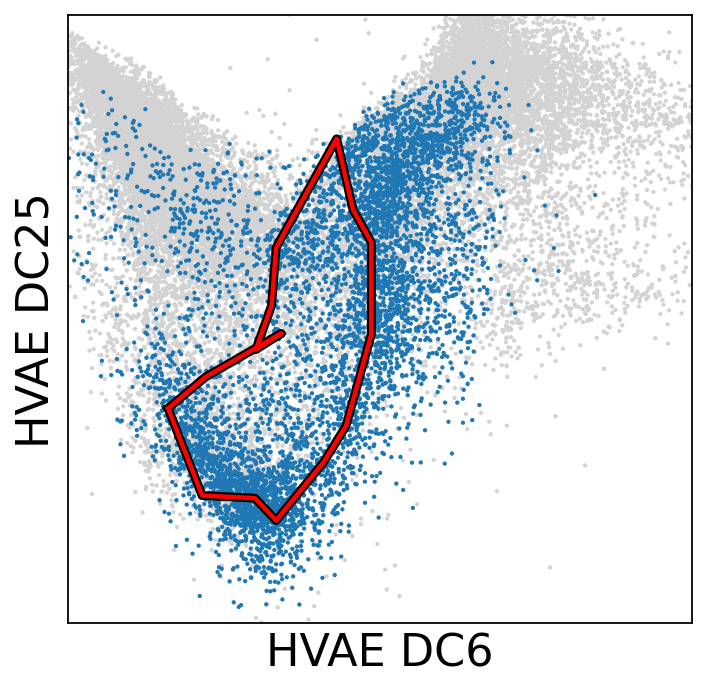

In [211]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["loop_neighborhood"],
    components="6,25",
    # legend_loc="on data",
    size=15,
    show=False,
    # cmap="YlGn",
    # vmax=150,
    # # add_outline=True,
    # vmin=141,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    legend_loc=None,
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
ax.plot(
    out[1][0][:, 0],
    out[1][0][:, 1],
    color="red",
    lw=2,
    path_effects=[path_effects.withStroke(linewidth=4, foreground="black")],
)
# plt.savefig(
#     "/home/stanfish/zhiyu/Desktop/vae_somite_loop_on_neighborhood.png",
#     dpi=300,
#     bbox_inches="tight",
# )

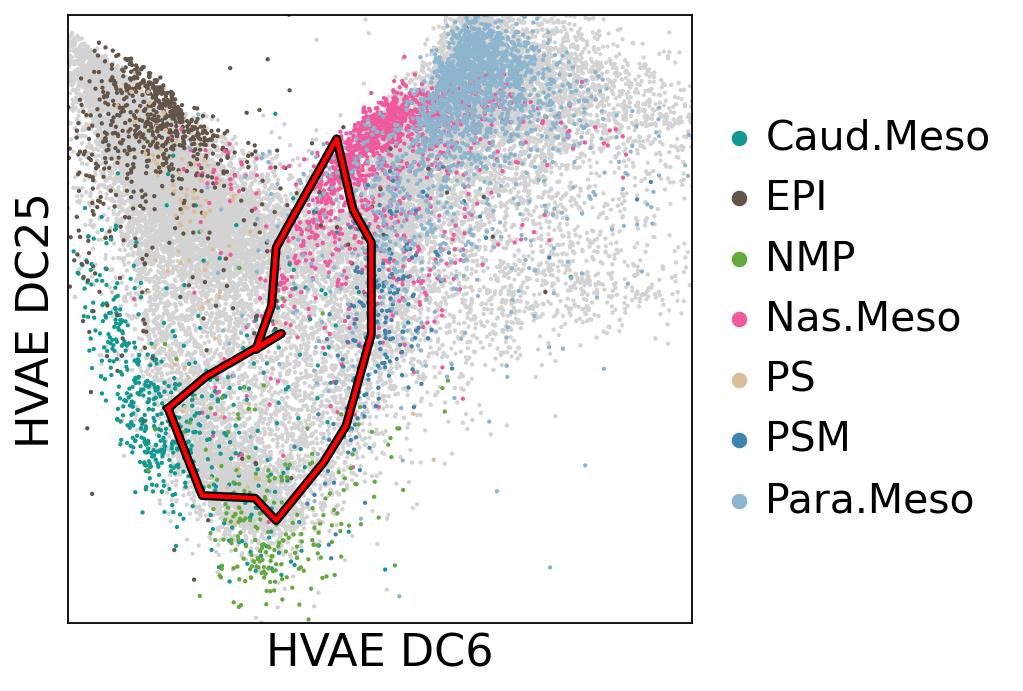

In [143]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["cell_type"],
    components="6,25",
    # legend_loc="on data",
    size=15,
    show=False,
    # cmap="YlGn",
    # vmax=150,
    # # add_outline=True,
    # vmin=141,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    # legend_loc=None,
    palette=monkey_cmap,
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
ax.plot(
    out[1][0][:, 0],
    out[1][0][:, 1],
    color="red",
    lw=2,
    path_effects=[path_effects.withStroke(linewidth=4, foreground="black")],
)
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_on_monkey.png",
    dpi=300,
    bbox_inches="tight",
)


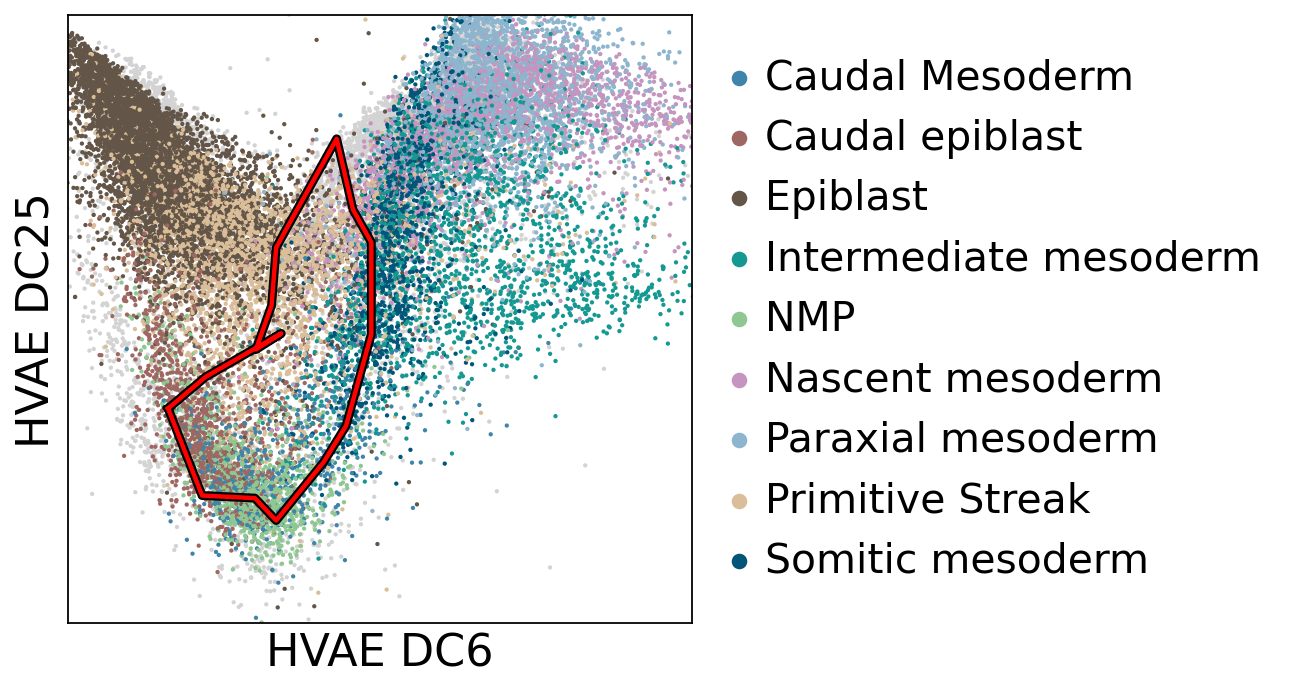

In [ ]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    color=["celltype"],
    components="6,25",
    # legend_loc="on data",
    size=15,
    show=False,
    # cmap="YlGn",
    # vmax=150,
    # # add_outline=True,
    # vmin=141,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    # legend_loc=None,
    palette=mouse_cmap,
    # xlim=[0, 100]
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
ax.plot(
    out[1][0][:, 0],
    out[1][0][:, 1],
    color="red",
    lw=2,
    path_effects=[path_effects.withStroke(linewidth=4, foreground="black")],
)
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_on_mouse.png",
    dpi=300,
    bbox_inches="tight",
)

In [151]:
import scvelo as scv

scv.pp.filter_and_normalize(adata_sub, min_shared_counts=20, n_top_genes=1500)

Filtered out 808 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.


/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.


In [188]:
sc.pp.neighbors(adata_sub, use_rep="X_vae", n_neighbors=50, method="gauss")

In [189]:
scv.pp.moments(adata_sub, n_pcs=50, n_neighbors=50)

computing moments based on connectivities
    finished (0:00:06) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [190]:
scv.tl.velocity(adata_sub)

computing velocities


/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:06) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [191]:
scv.tl.velocity_graph(adata_sub, basis="X_vae")

        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/24 cores)


/home/stanfish/.local/share/mise/installs/python/3.12.11/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=3198434) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


    finished (0:01:27) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:01:54) --> added
    'velocity_diffmap_vae', embedded velocity vectors (adata.obsm)


/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


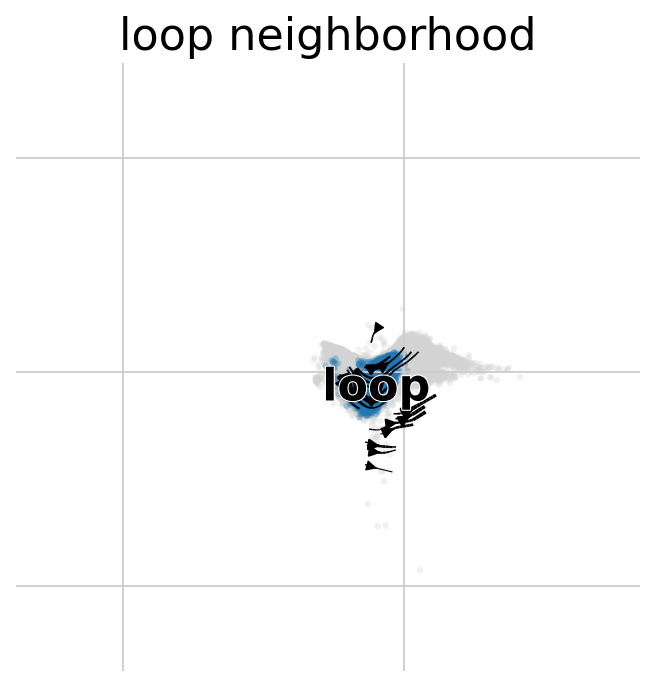

In [192]:
scv.pl.velocity_embedding_stream(
    adata_sub,
    basis="diffmap_vae",
    components="5,24",
    color="loop_neighborhood",
    recompute=True,
)

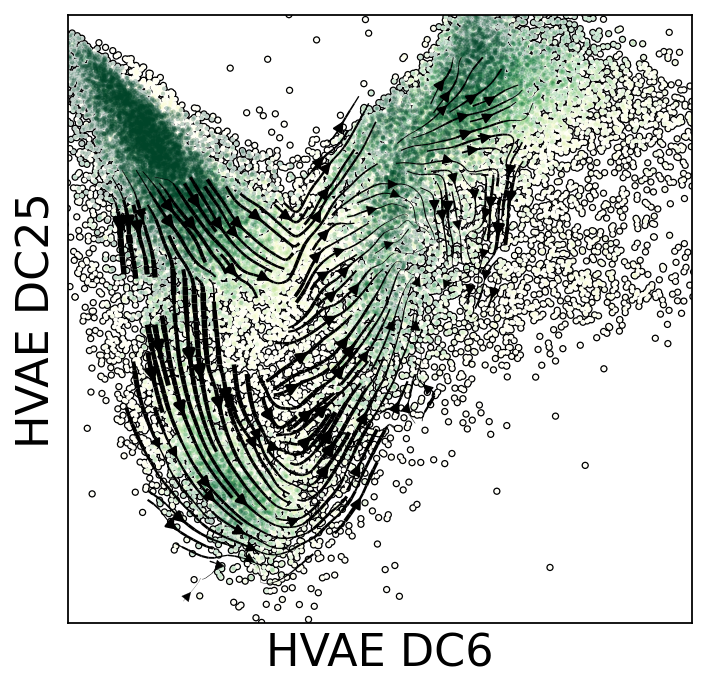

In [277]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    components="6,25",
    color=["vae_density_log"],
    size=15,
    show=False,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    cmap="YlGn",
    vmax=150,
    add_outline=True,
    vmin=141,
    alpha=0.25,
)
scv.pl.velocity_embedding_stream(
    adata_sub[
        np.logical_and(
            adata_sub.obs["loop_neighborhood"] == "loop",
            adata_sub.obs["vae_density_log"] > 143,
        )
    ],
    basis="diffmap_vae",
    show=False,
    components="5,24",
    n_neighbors=50,
    max_length=10,
    min_mass=0.25,
    density=2.0,
    linewidth=1.5,
    # color="loop_neighborhood",
    recompute=False,
    ax=ax,
    size=1,
    frameon=True,
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_on_RNA.png",
    dpi=300,
    bbox_inches="tight",
)

<Axes: xlabel='X_diffmap_vae6', ylabel='X_diffmap_vae25'>

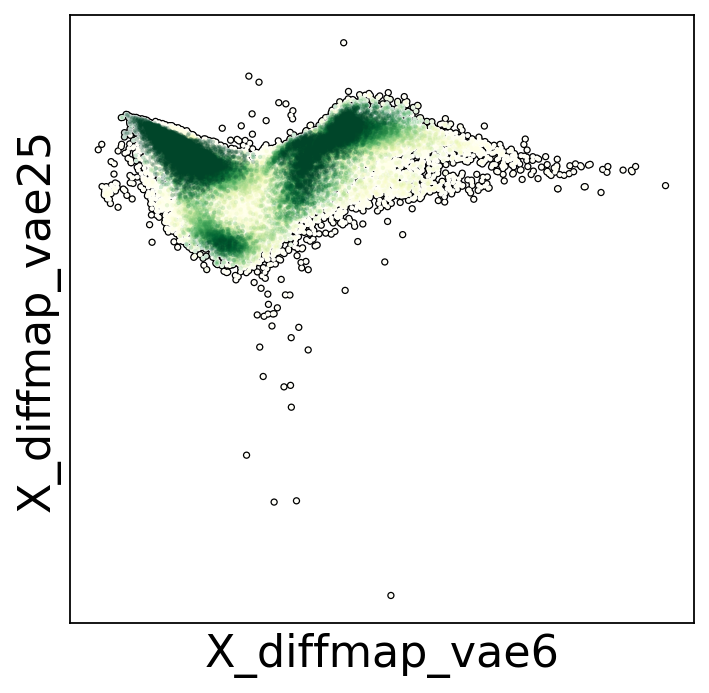

In [278]:
sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    components="6,25",
    color=["vae_density_log"],
    size=15,
    show=False,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    cmap="YlGn",
    vmax=150,
    add_outline=True,
    vmin=141,
    alpha=0.25,
)


In [ ]:
adata_sub.uns["iroot"] = np.argmin(
    adata_sub.obsm["X_diffmap_vae"][:, 5] - adata_sub.obsm["X_diffmap_vae"][:, 24]
)

In [283]:
adata_sub.obsm["X_diffmap"] = adata_sub.obsm["X_diffmap_vae"]

In [284]:
sc.tl.dpt(adata_sub)

In [294]:
import cellrank as cr

/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/cellrank/pl/_heatmap.py:11: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [311]:
pk = cr.kernels.PseudotimeKernel(
    adata_sub[
        np.logical_and(
            adata_sub.obs["loop_neighborhood"] == "loop",
            adata_sub.obs["vae_density_log"] > 141,
        )
    ],
    time_key="dpt_pseudotime",
)
pk.compute_transition_matrix()

  0%|          | 0/4321 [00:00<?, ?cell/s]/home/stanfish/.local/share/mise/installs/python/3.12.11/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=3198434) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
100%|██████████| 4321/4321 [00:01<00:00, 2798.68cell/s]


PseudotimeKernel[n=4321, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [308]:
pk.adata = pk.adata[
    np.logical_and(
        adata_sub.obs["loop_neighborhood"] == "loop",
        adata_sub.obs["vae_density_log"] > 140,
    )
]

IndexError: Boolean index does not match AnnData’s shape along this dimension. Boolean index has shape (28887,) while AnnData index has shape (3627,).

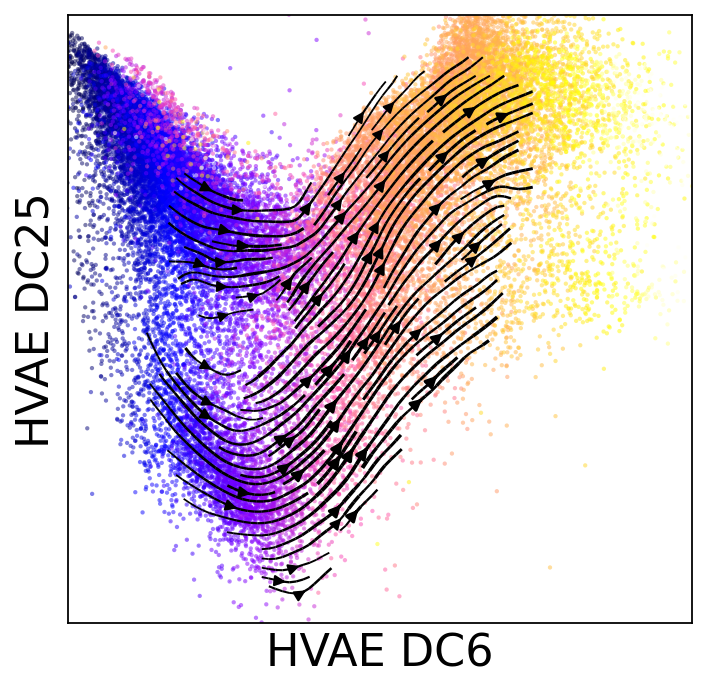

In [ ]:
ax = sc.pl.embedding(
    adata_sub,
    basis="X_diffmap_vae",
    components="6,25",
    color=["dpt_pseudotime"],
    size=15,
    show=False,
    na_in_legend=False,
    frameon=True,
    title=["", ""],
    colorbar_loc=None,
    cmap="gnuplot2",
    vmax=0.25,
    # add_outline=True,
    # vmin=141,
    alpha=0.5,
)
pk.plot_projection(
    basis="diffmap_vae",
    recompute=False,
    ax=ax,
    components="5,24",
    show=False,
    size=1,
    frameon=True,
)
ax.set_xlabel("HVAE DC6")
ax.set_ylabel("HVAE DC25")
ax.set_xlim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 5], [0.5, 99]))
ax.set_ylim(np.percentile(adata_sub.obsm["X_diffmap_vae"][:, 24], [0.1, 99]))
plt.savefig(
    "/home/stanfish/zhiyu/Desktop/vae_somite_loop_on_pseudotime.png",
    dpi=300,
    bbox_inches="tight",
)

# others

In [4]:
import pathlib
from itertools import combinations

save_dir = pathlib.Path("./img_dump/monkey_diffmap_3")
save_dir.mkdir(exist_ok=True, parents=True)
overwrite = True

for i, j in combinations(range(25), 2):
    if overwrite or not (save_dir / f"diffmap_{i}_{j}.png").exists():
        adata_sub = adata[
            np.logical_or(
                adata.obs["cell_type"].str.contains(
                    "Para.Meso|PSM|NMP|Nas|EPI|^PS", na=False
                ),
                adata.obs["celltype"].str.contains(
                    "Epi|^Primi|Nascent|Somitic|Paraxial|Caudal|NMP", na=False
                ),
            )
        ]
        axes = sc.pl.embedding(
            adata_sub,
            basis="X_diffmap_scvi",
            color=["cell_type", "celltype"],
            components=f"{i + 1},{j + 1}",
            # legend_loc="on data",
            ncols=2,
            size=50,
            show=False,
            na_in_legend=False,
            frameon=False,
            title=["", ""],
            # xlim=[0, 100]
        )
        for ax in axes:
            ax.set_xlim(
                np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, i], [0.1, 99.9])
            )
            ax.set_ylim(
                np.percentile(adata_sub.obsm["X_diffmap_scvi"][:, j], [0.1, 99.9])
            )
        plt.savefig(
            save_dir / f"diffmap_{i + 1}_{j + 1}.png", dpi=100, bbox_inches="tight"
        )
        plt.close()